# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files)) 

There are 0 total human images.
There are 0 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


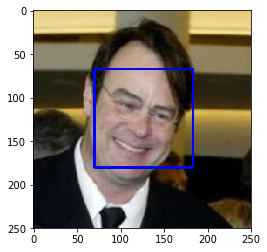

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
- Face detected in human images : 98
- Face detected in dog images : 17
- Time to detect faces using haarcascades:  32.70175242424011

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
import time;
tstart = time.time()
print("Face detected in human images :", np.sum(face_detector(human_filepath) for human_filepath in human_files_short))
print("Face detected in dog images :", np.sum(face_detector(dog_filepath) for dog_filepath in dog_files_short))
tend = time.time() - tstart
print("Time to detect faces using haarcascades: ", tend) 

Face detected in human images : 98
Face detected in dog images : 17
Time to detect faces using haarcascades:  32.70175242424011


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

__Another Approach:__
- Another approach I used was facenet-pytorch MTCNN to detect faces
- The output produced for the below code is as follows:
  - Face detected in human images : 100
  - Face detected in dog images : 23
  - Time to detect faces using MTCNN:  33.65223145484924

In [ ]:
### (Optional) 
# Here is another approach using facenet-pytorch MTCNN to detect faces
# Multi-Task Cascaded Convolutional Neural Network (MTCNN)
from facenet_pytorch import MTCNN
from PIL import Image

In [ ]:

### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
# MTCNN in facenet-pytorch
def face_detector_mtcnn(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (250, 250))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    frame = Image.fromarray(img)
    mtcnn = MTCNN(keep_all=True, post_process=False) 
    faces = mtcnn(frame)
    if faces is not None:
        return len(faces) > 0
    else:
        return 0

In [ ]:
# Due to environment issue on Workspace, I executed MTCNN on my local machine 
tstart = time.time()
print("Face detected in human images :", np.sum(face_detector_mtcnn(human_filepath) for human_filepath in human_files_short))
print("Face detected in dog images :", np.sum(face_detector_mtcnn(dog_filepath) for dog_filepath in dog_files_short))
tend = time.time() - tstart
print("Time to detect faces using MTCNN: ", tend) 

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:06<00:00, 82350458.65it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
    img = transform(img)
    if use_cuda:
        img = img.cuda()
    img = img.unsqueeze_(0)   
    output = VGG16(img)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    prediction = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    pred_class = VGG16_predict(img_path)
    
    return 1 if pred_class in range(151,269) else 0

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

- Dogs detected in human images : 0
- Dogs detected in dog images : 100
- Time to detect faces using VGG19:  7.877138614654541

In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
import time
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
tstart = time.time()
print("Dogs detected in human images :", np.sum(dog_detector(human_filepath) for human_filepath in human_files_short))
print("Dogs detected in dog images :", np.sum(dog_detector(dog_filepath) for dog_filepath in dog_files_short))
tend = time.time() - tstart
print("Time to detect faces using VGG19: ", tend)

Dogs detected in human images : 0
Dogs detected in dog images : 100
Time to detect faces using VGG19:  7.877138614654541


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
RESNET50 = models.resnet50(pretrained=True)
if use_cuda:
    RESNET50 = RESNET50.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 78980380.54it/s]


In [10]:
def RESNET_predict(img_path):
    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
    img = transform(img)
    if use_cuda:
        img = img.cuda()
    img = img.unsqueeze_(0)   
    output = RESNET50(img)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    prediction = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    return prediction # predicted class index

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_RESNET(img_path):
    pred_class = RESNET_predict(img_path)
    return 1 if pred_class in range(151,269) else 0

In [12]:
tstart = time.time()
print("Dogs detected in human images :", np.sum(dog_detector_RESNET(human_filepath) for human_filepath in human_files_short))
print("Dogs detected in dog images :", np.sum(dog_detector_RESNET(dog_filepath) for dog_filepath in dog_files_short))
tend = time.time() - tstart
print("Time to detect faces using RESNET50: ", tend) 

Dogs detected in human images : 0
Dogs detected in dog images : 0
Time to detect faces using RESNET50:  6.147613286972046


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
import torch
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '/data/dog_images'
batch_size = 20
num_workers = 0

standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

data_transforms = {'train': transforms.Compose([transforms.Resize(size=256),
                                                transforms.CenterCrop(224),
                                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                                transforms.RandomRotation(10),
                                                transforms.ToTensor(),
                                                standard_normalization]),                                                       
                   'valid': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])
                  }


train_data = datasets.ImageFolder(data_dir + '/train', transform=data_transforms['train'])
val_data = datasets.ImageFolder(data_dir + '/valid', transform=data_transforms['valid'])
test_data = datasets.ImageFolder(data_dir + '/test', transform=data_transforms['test'])

train_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data,  batch_size, shuffle = True)
loaders_scratch = {'train' : train_loader,
                   'valid' : val_loader,
                   'test' : test_loader}

In [7]:
class_names = train_data.classes
nb_classes = len(class_names)

print("Number of classes:", nb_classes)
print("\nClass names: \n\n", class_names)

Number of classes: 133

Class names: 

 ['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog'

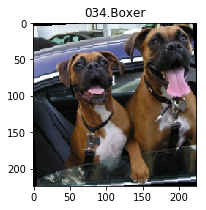

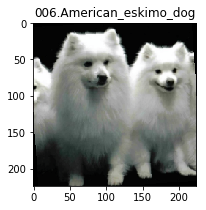

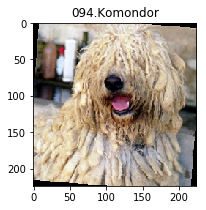

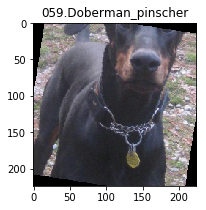

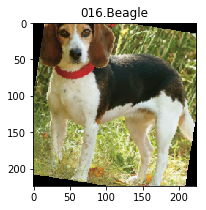

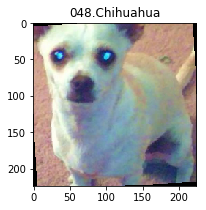

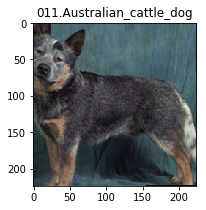

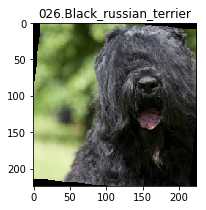

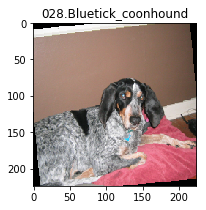

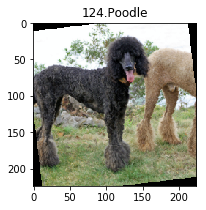

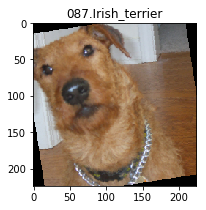

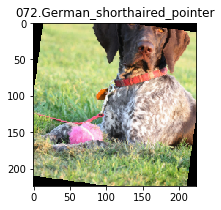

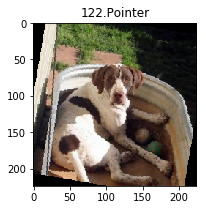

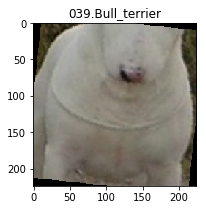

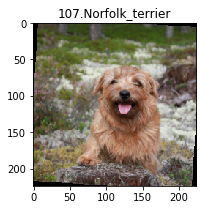

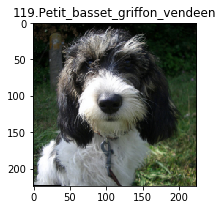

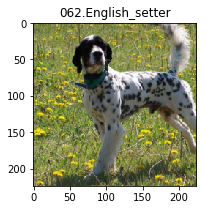

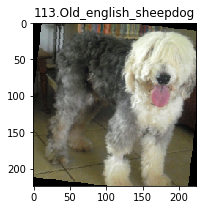

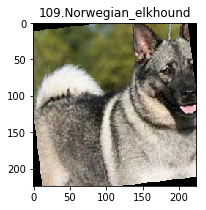

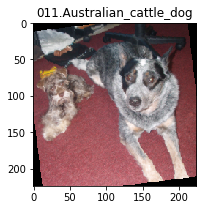

In [8]:
# Get a batch of training data
inputs, classes = next(iter(train_loader))

for image, label in zip(inputs, classes): 
    image = image.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)
     
    fig = plt.figure(figsize=(12,3))
    plt.imshow(image)
    plt.title(class_names[label])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
I loaded in the training, test and validation data, then created DataLoaders for each of these sets of data.

I first started with resizing the image to 320, to match to 5 convs to go deeper and get more features. But a size of 320 made the processing slow and so i switched to a standard size of 256.
I resized all image to 256, center cropped and added some simple data augmentation by randomly flipping and rotating the given image data. Earlier, I tried using the RandomResizedCrop(224), but the results were not as good as with Center crop. 

Most of the pretrained models require the input to be 224x224 images. Also, we'll need to match the normalization used when the models were trained. Each color channel was normalized separately, the means are [0.485, 0.456, 0.406] and the standard deviations are [0.229, 0.224, 0.225].

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

num_classes = 133 # total classes of dog breeds

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        #conv1 sees 224x224x3 image tensor
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        #conv1 sees 112x112x16 image tensor
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        #conv1 sees 56x56x32 image tensor
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        #conv1 sees 28x28x64 image tensor
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        #conv1 sees 14x14x128 image tensor
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        
        #Maxpooling layer
        self.pool = nn.MaxPool2d(2,2)
        
        #Linear layers
        #fc1 sees 28x28x128 image tensor
        self.fc1 = nn.Linear(7*7*256, 500)
        self.fc2 = nn.Linear(500, num_classes)
        
        #dropout p =0.25
        self.dropout = nn.Dropout(p=0.25)
        
        #Normalization
        self.conv_bn1 = nn.BatchNorm2d(16)
        self.conv_bn2 = nn.BatchNorm2d(32)
        self.conv_bn3 = nn.BatchNorm2d(64)
        self.conv_bn4 = nn.BatchNorm2d(128)
        self.conv_bn5 = nn.BatchNorm2d(256)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.conv_bn1(self.pool(F.relu(self.conv1(x))))
        x = self.conv_bn2(self.pool(F.relu(self.conv2(x))))
        x = self.conv_bn3(self.pool(F.relu(self.conv3(x))))
        x = self.conv_bn4(self.pool(F.relu(self.conv4(x))))
        x = self.conv_bn5(self.pool(F.relu(self.conv5(x))))
        
        x = x.view(-1, 7*7*256)
        x = self.dropout(x)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
The model architecture:

- I used the 5 convolution layers all with the filter of size = 3, stride = 1 and padding = 1., to extract more and  more features from the images.
- Relu activations are used after each convoltution layers.
- Applied Max pooling layers of 2×2, to reduce the dimentions
- Used 2 fully connected layer, first with the Relu activation and final layer without any activation or dropout, to predict the class of the dog breed
- Applied Spatial Batch normalization after each max pool layer. It reduces the amount by what the hidden unit values shift around (covariance shift). If the input layer is benefiting from it, i thought of doing the same thing also for the values in the hidden layers, that are changing all the time, and i found improvement in the training speed.
- Applied dropout with the probability of 0.25.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            #forward pass
            output = model(data)
            #Calculate loss
            loss = criterion(output,target)
            #Backpropagation - compute gardient loss w.r.t model parameters
            loss.backward()
            #optimize the parameters
            optimizer.step()
            #train_loss += loss.item()
            # update training loss
            #train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            #forward pass
            output = model(data) 
            #Calculate loss
            loss = criterion(output,target)
            # update average validation loss 
            #valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            
        # calculate average losses
        #train_loss = train_loss/len(loaders['train'].dataset)
        #valid_loss = valid_loss/len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
        torch.save(model.state_dict(),save_path)
        valid_loss_min = valid_loss
            
    # return trained model
    return model


In [17]:
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 3.500697 	Validation Loss: 3.748983
Validation loss decreased (inf --> 3.748983).  Saving model ...
Epoch: 2 	Training Loss: 3.473498 	Validation Loss: 3.720633
Validation loss decreased (3.748983 --> 3.720633).  Saving model ...
Epoch: 3 	Training Loss: 3.441588 	Validation Loss: 3.707782
Validation loss decreased (3.720633 --> 3.707782).  Saving model ...
Epoch: 4 	Training Loss: 3.393376 	Validation Loss: 3.683260
Validation loss decreased (3.707782 --> 3.683260).  Saving model ...
Epoch: 5 	Training Loss: 3.369807 	Validation Loss: 3.707676
Epoch: 6 	Training Loss: 3.326663 	Validation Loss: 3.627609
Validation loss decreased (3.707676 --> 3.627609).  Saving model ...
Epoch: 7 	Training Loss: 3.284147 	Validation Loss: 3.604582
Validation loss decreased (3.627609 --> 3.604582).  Saving model ...
Epoch: 8 	Training Loss: 3.253697 	Validation Loss: 3.625949
Epoch: 9 	Training Loss: 3.221056 	Validation Loss: 3.588382
Validation loss decreased (3.625949 --> 3.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [18]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.498201


Test Accuracy: 18% (156/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
import os
import torch
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '/data/dog_images'
batch_size = 20
num_workers = 0

standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

data_transforms = {'train': transforms.Compose([transforms.Resize(size=256),
                                                transforms.CenterCrop(224),
                                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                                transforms.RandomRotation(10),
                                                transforms.ToTensor(),
                                                standard_normalization]),                                                       
                   'valid': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])
                  }


train_data = datasets.ImageFolder(data_dir + '/train', transform=data_transforms['train'])
val_data = datasets.ImageFolder(data_dir + '/valid', transform=data_transforms['valid'])
test_data = datasets.ImageFolder(data_dir + '/test', transform=data_transforms['test'])

train_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data,  batch_size, shuffle = True)

loaders_transfer = {'train' : train_loader,
                   'valid' : val_loader,
                   'test' : test_loader}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [48]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

# Freeze training for all conv layers
for param in model_transfer.parameters():
    param.requires_grad = False

n_inputs = model_transfer.fc.in_features

# add last linear layer (n_inputs -> 133 dog's breed classes)
last_layer = nn.Linear(n_inputs, num_classes)
model_transfer.fc = last_layer # new layers automatically have requires_grad = True
print(model_transfer)


if use_cuda:
    model_transfer = model_transfer.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
For image classification especially like identifying breed etc, depth of the images is very important. Residual
networks are easier to optimize, and can gain accuracy from considerably increased depth.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [49]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [53]:
# train the model
n_epochs=20
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.831819 	Validation Loss: 1.595092
Validation loss decreased (inf --> 1.595092).  Saving model ...
Epoch: 2 	Training Loss: 1.775426 	Validation Loss: 1.519397
Validation loss decreased (1.595092 --> 1.519397).  Saving model ...
Epoch: 3 	Training Loss: 1.703852 	Validation Loss: 1.494079
Validation loss decreased (1.519397 --> 1.494079).  Saving model ...
Epoch: 4 	Training Loss: 1.662461 	Validation Loss: 1.439208
Validation loss decreased (1.494079 --> 1.439208).  Saving model ...
Epoch: 5 	Training Loss: 1.615064 	Validation Loss: 1.363975
Validation loss decreased (1.439208 --> 1.363975).  Saving model ...
Epoch: 6 	Training Loss: 1.566057 	Validation Loss: 1.326867
Validation loss decreased (1.363975 --> 1.326867).  Saving model ...
Epoch: 7 	Training Loss: 1.535930 	Validation Loss: 1.303881
Validation loss decreased (1.326867 --> 1.303881).  Saving model ...
Epoch: 8 	Training Loss: 1.474918 	Validation Loss: 1.259596
Validation loss decreased (1.30388

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [54]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.077962


Test Accuracy: 80% (671/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [55]:
from PIL import Image
import torchvision.transforms as transforms

def load_input_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])

    image = prediction_transform(image)
    return image

In [56]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

In [57]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#print(train_data.classes)
class_names = [item[4:].replace("_", " ") for item in train_data.classes]
#print(class_names)
# load the model that got the best validation accuracy (uncomment the line below)

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    #img = Image.open(img_path)
    #transform = transforms.Compose([transforms.Resize(256),
    #                                transforms.CenterCrop(224),
    #                                transforms.ToTensor(),
    #                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
    #                                                     std=[0.229, 0.224, 0.225])])
    img = load_input_image(img_path)
    if use_cuda:
        img = img.cuda()
    img = img.unsqueeze_(0)   
    output = model_transfer(img)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    prediction = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[prediction]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [70]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    print('\n\n\n')
    if face_detector(img_path) == True:
       print('Hello human!')
       showImage(img_path)
       print('You look like a ', predict_breed_transfer(img_path))
       
    elif dog_detector(img_path) == True:
       print('Hello it is a dog, and its predicted breed is ', predict_breed_transfer(img_path))
       showImage(img_path)
       
    else:
        print('The image provided is neither a human nor a dog!!!!')
        showImage(img_path)


In [60]:
def display_image(img_path):
    img = Image.open(img_path)
    fig = plt.figure(figsize=(12,3))
    plt.imshow(img)
    plt.show()

/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04211.jpg


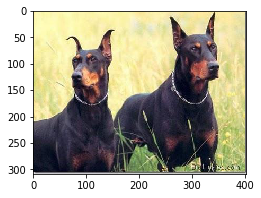

Predicted: Doberman pinscher
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04196.jpg


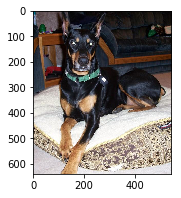

Predicted: Doberman pinscher
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04173.jpg


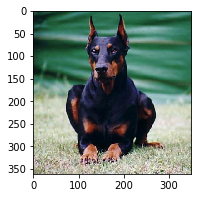

Predicted: Doberman pinscher
/data/dog_images/train/103.Mastiff/Mastiff_06865.jpg


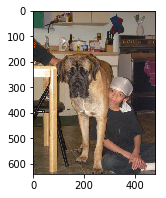

Predicted: Bullmastiff
/data/dog_images/train/103.Mastiff/Mastiff_06837.jpg


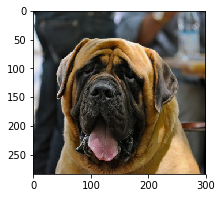

Predicted: Mastiff
/data/dog_images/train/103.Mastiff/Mastiff_06821.jpg


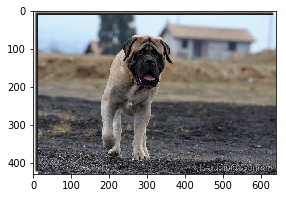

Predicted: Bullmastiff
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04162.jpg


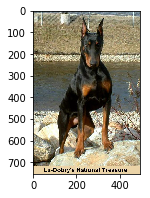

Predicted: Doberman pinscher
/data/dog_images/train/103.Mastiff/Mastiff_06860.jpg


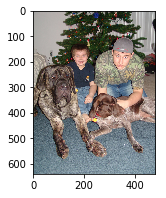

Predicted: German shorthaired pointer
/data/dog_images/train/103.Mastiff/Mastiff_06866.jpg


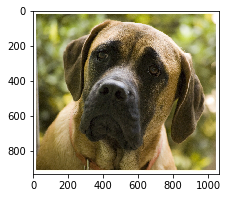

Predicted: Mastiff


In [65]:
import random

# Try out the function
for image in random.sample(list(dog_files_short), 9):
    print(image)
    predicted_breed = predict_breed_transfer(image)
    display_image(image)
    print("Predicted:",predicted_breed)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
 

- Yes I am quite happy with the outputs. Earlier i used RESNET18 and inspite of 74% of accuracy the results were not very good. So I decided to go with RESNET50 and achive 80% accuracy on test data.

- Possible impovements:
    - Batch normalization for hidden layers can be effective and can speed up the training process
    - Algorithm should be able to handle the case of multiple dogs in a single image
    - There is a lot of repitions in my notebook and a code cleanup, making it more modular is required






Hello human!


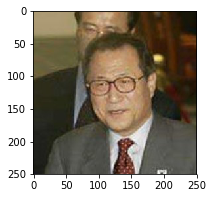

You look like a  Basenji




Hello human!


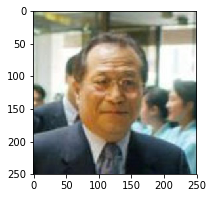

You look like a  Dachshund




Hello human!


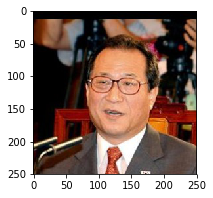

You look like a  Norfolk terrier




Hello human!


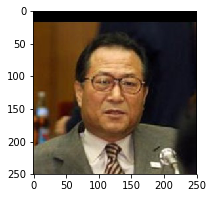

You look like a  Portuguese water dog




Hello human!


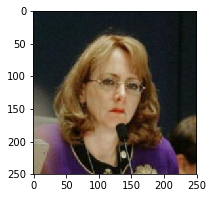

You look like a  Bichon frise




Hello human!


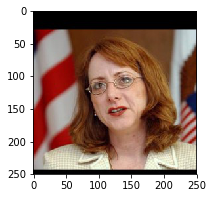

You look like a  Chinese crested




Hello human!


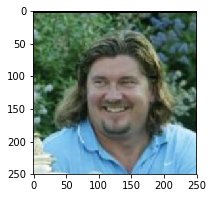

You look like a  American water spaniel




Hello human!


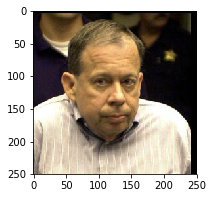

You look like a  Dogue de bordeaux




Hello human!


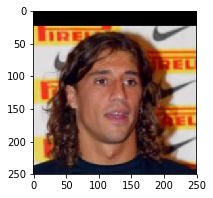

You look like a  Dachshund




Hello human!


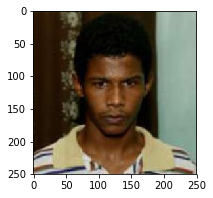

You look like a  Dogue de bordeaux




Hello human!


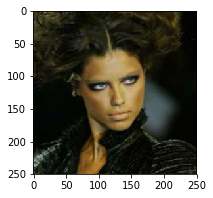

You look like a  Chinese crested




Hello human!


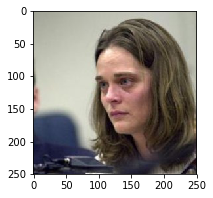

You look like a  American water spaniel




Hello human!


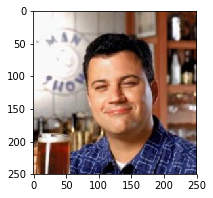

You look like a  Basenji




Hello human!


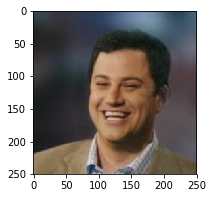

You look like a  American water spaniel




Hello human!


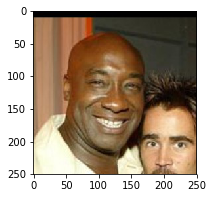

You look like a  Dogue de bordeaux




Hello human!


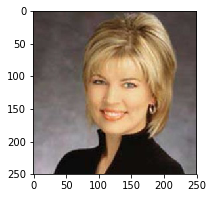

You look like a  Bichon frise




Hello human!


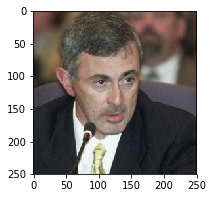

You look like a  American water spaniel




Hello human!


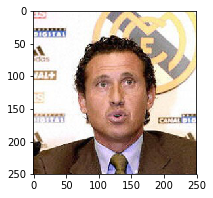

You look like a  Dachshund




Hello human!


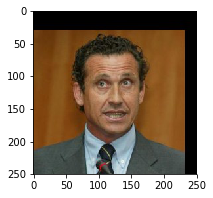

You look like a  Norfolk terrier




Hello human!


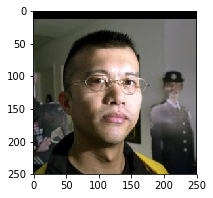

You look like a  Dachshund




Hello human!


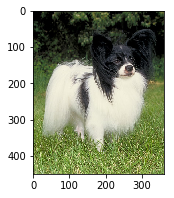

You look like a  Papillon




Hello it is a dog, and its predicted breed is  Papillon


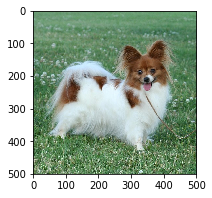





Hello it is a dog, and its predicted breed is  Papillon


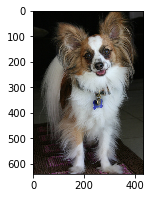





Hello it is a dog, and its predicted breed is  Papillon


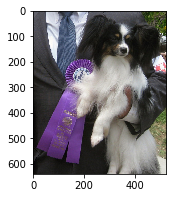





Hello it is a dog, and its predicted breed is  Papillon


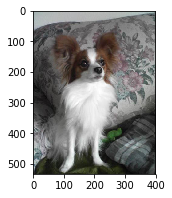





Hello it is a dog, and its predicted breed is  Papillon


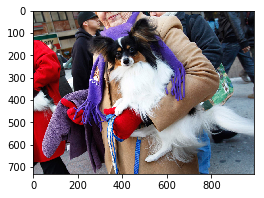





Hello it is a dog, and its predicted breed is  Papillon


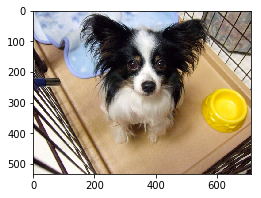





Hello it is a dog, and its predicted breed is  Papillon


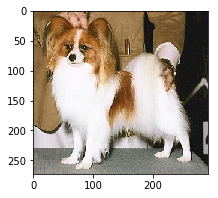





Hello it is a dog, and its predicted breed is  Papillon


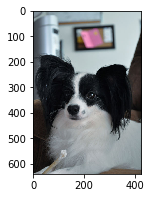





Hello it is a dog, and its predicted breed is  Papillon


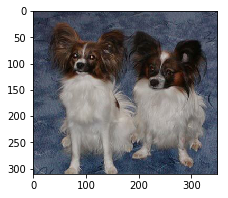

In [67]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[10:30], dog_files[500:510])):
    run_app(file)





The image provided is neither a human nor a dog!!!!


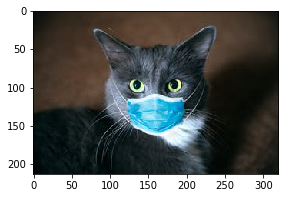





The image provided is neither a human nor a dog!!!!


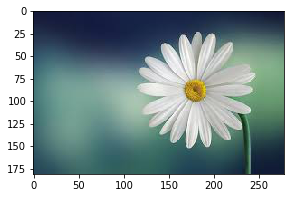





The image provided is neither a human nor a dog!!!!


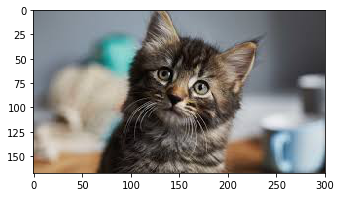





The image provided is neither a human nor a dog!!!!


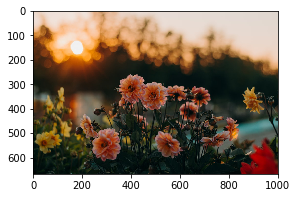





Hello human!


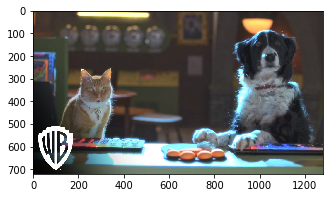

You look like a  Dachshund




Hello human!


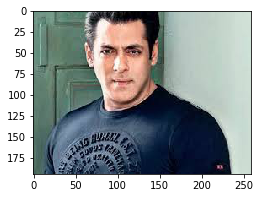

You look like a  Chinese crested




Hello human!


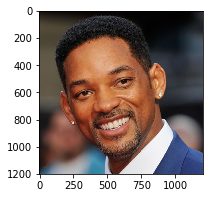

You look like a  Basenji


In [71]:
for img_file in os.listdir('./images/test_images'):
    img_path = os.path.join('./images/test_images', img_file)
    run_app(img_path)